# 3. Burgers' Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Initial conditions

Space points = 1001 Space interval = 0.01
Time points = 1001 Time interval = 0.0005


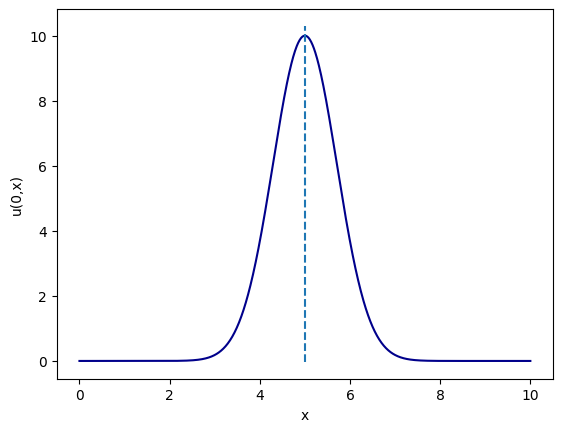

In [2]:
J = 1001
dx = (10-0)/(J-1)
x0 = 5
x = np.linspace(0,10,J)
u0 = np.zeros(len(x))
for i in range(len(x)):
    u0[i] = 10 * np.exp(-(x[i]-x0)**2)          # initial function
plt.plot(x,u0, color='darkblue')
plt.xlabel('x')
plt.ylabel('u(0,x)')
plt.vlines(5,-0.03,10.3,linestyles='--')
#plt.savefig('./Homework_1/images/3_initial.png',dpi=150)
print('Space points =',len(x),'Space interval =',dx)

# TIME
T = 0.5     # final time
cf = 0.5   # Courant factor
a = 10     # max of the initial function (max of the velocity)
dt = cf*dx/a
Nt = int(T/dt + 1)  # number of time intervals
print('Time points =',Nt,'Time interval =',dt)

### Evolution in time: non conservative

In [ ]:
u_current = u0.copy()

t = 0
i = 0

plt.plot(x,u0,color='r',label='t = 0',linestyle='--',linewidth=1)

while t<T:
    u_next = u_current - dt/dx*u_current*(u_current- np.roll(u_current,+1))    
        
    u_current = u_next.copy()
    
    if i%int(100*(J/1001))==0:
        plt.plot(x,u_current,color = 'b',linewidth=i*(1001/J)/500)

    t = t+dt
    i += 1
    
plt.plot(x,u_current,color='r',linewidth=i*(1001/J)/500)
plt.title('non-conservative')
plt.xlabel('x')
plt.ylabel('u(x,t)')
#plt.savefig('./Homework_1/images/3_evol_NC.png',dpi=150)
plt.show()    


plt.plot(x,u0,color='darkblue',label='t = 0')
plt.plot(x,u_current,color='r',label='t = '+str(T))
#plt.savefig('burgers_NC_inifin_101.png',dpi=300)
plt.legend()
plt.show()

### Evolution in time: conservative

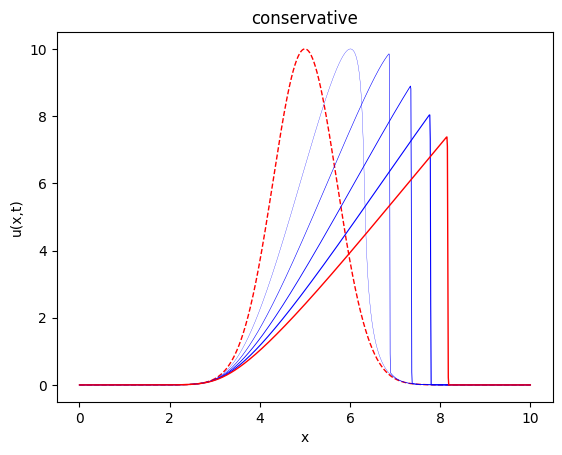

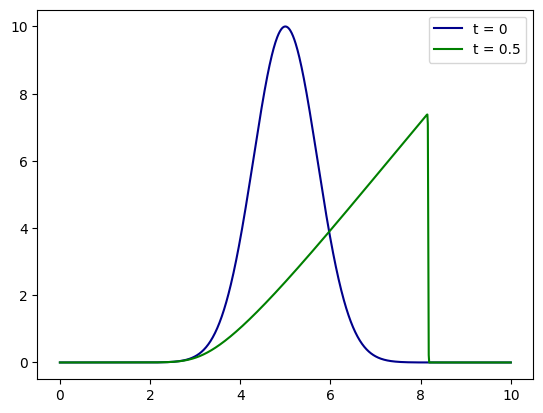

In [117]:
u_currentC = u0.copy()

t = 0
i = 0

plt.plot(x,u0,color='r',label='t = 0',linestyle='--',linewidth=1)

while t<T:
    u_nextC = u_currentC - dt/dx/2*(u_currentC**2- np.roll(u_currentC,+1)**2)    
        
    u_currentC = u_nextC.copy()
    
    if i%int(100*(J/1001))==0:
        plt.plot(x,u_currentC,color='b',linewidth=i*(1001/J)/500)
        
    t = t+dt
    i += 1

plt.plot(x,u_currentC,color='r',linewidth=i*(1001/J)/500)
plt.title('conservative')
plt.xlabel('x')
plt.ylabel('u(x,t)')
#plt.savefig('./Homework_1/images/3_evol_CS.png',dpi=150)
plt.show()

plt.plot(x,u0,color='darkblue',label='t = 0')
plt.plot(x,u_currentC,color='g',label='t = '+str(T))
#plt.savefig('burgers_C_inifin_101.png',dpi=300)
plt.legend()
plt.show()

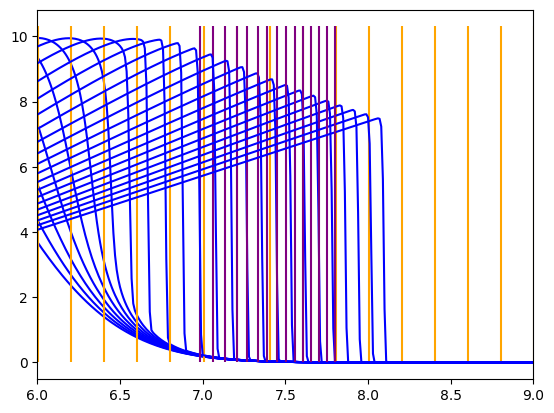

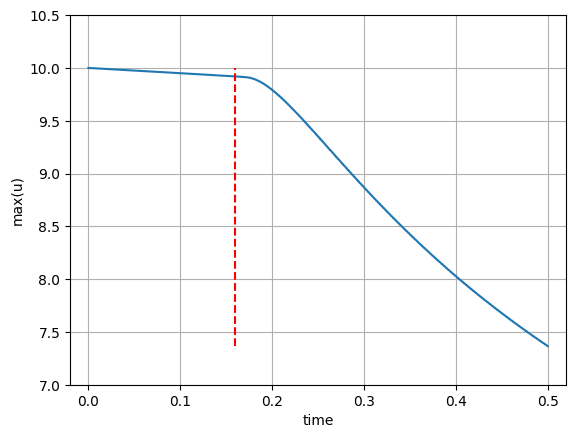

In [14]:
u_currentC = u0.copy()
u_currentNC = u0.copy()

t = 0
time=[]
time.append(0)
X = 5
i=0
maxima = []
maxima.append(max(u0))
cut = 0.16

while t<T:
    
    u_nextC = u_currentC - dt/dx/2*(u_currentC**2- np.roll(u_currentC,+1)**2)           
    u_currentC = u_nextC.copy()
    u_nextNC = u_currentNC - dt/dx*u_currentNC*(u_currentNC- np.roll(u_currentNC,+1))  
    u_currentNC = u_nextNC.copy()
    X += max(u0)*dt
    t = t+dt
    time.append(t)
    maxima.append(max(u_currentC))
    
    if i%40==0:
        plt.plot(x,u_currentC,color='b')
        #plt.plot(x,u_currentNC,color='r',linewidth=0.5)
        plt.vlines(X,0,10.3,color='orange')
               
    i+=1
#plt.savefig('./Homework_1/images/3_expected.png',dpi=150)
plt.show()

plt.plot(time,maxima)
plt.vlines(cut,min(maxima),max(maxima), linestyle='--',color='r')
plt.grid()
plt.xlabel('time')
plt.ylabel('max(u)')
plt.xlim(-0.02,0.52)
plt.ylim(7,10.5)
plt.show()

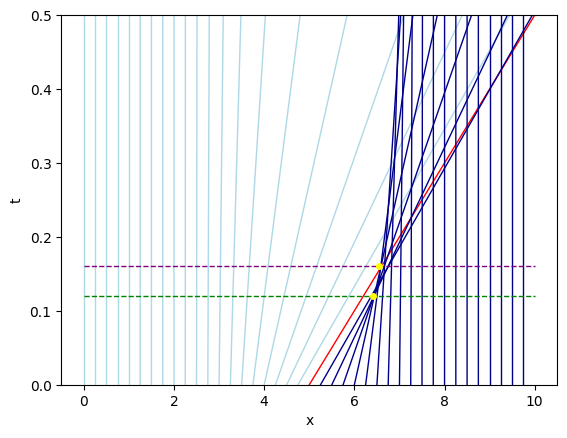

In [166]:
n = 40
cspace = np.linspace(0,10,1000)
ctime = np.zeros((n, len(cspace)))

for c in range(n):
    for i in range(len(cspace)):
        ctime[c][i] = (cspace[i]-10*c/n)/u0[int(len(u0)*c/n)]
    
    if 10*c/n>=5.1:
        plt.plot(cspace,ctime[c][:],color='darkblue',linewidth=1)
    elif 10*c/n<=4.9:
        plt.plot(cspace,ctime[c][:],color='lightblue',linewidth=1)
    else:
        plt.plot(cspace,ctime[c][:],color='r',linewidth=1)
plt.ylim(0,0.5)
plt.xlabel('x')
plt.ylabel('t')
plt.plot(cspace,0*cspace+cut,linestyle='--',color='purple',linewidth=1)
plt.plot(cspace,0*cspace+0.12,linestyle='--',color='g',linewidth=1)
plt.plot([6.42,6.55],[0.12,cut],'o',markersize=4,color='yellow')
#plt.savefig('./Homework_1/images/3_characteristics.png',dpi=150)
plt.show()

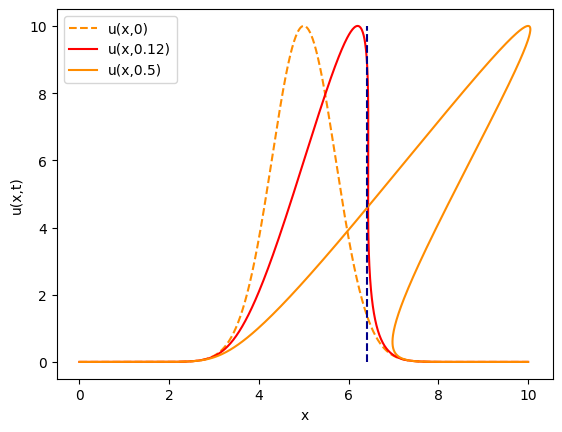

In [167]:
tshock = 0.12

u_real = np.zeros((2,len(u0)))
u_real[1,:] = np.copy(u0)
for i in range(len(x)):
    u_real[0,i] = x[i]+u0[i]*tshock

plt.plot(x,u0,linestyle='--',color='darkorange',label='u(x,0)')
plt.plot(u_real[0],u_real[1],color='red',label='u(x,0.12)')
for i in range(len(x)):
    u_real[0,i] = x[i]+u0[i]*T
plt.plot(u_real[0],u_real[1],color='darkorange',label='u(x,0.5)')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.vlines(6.42,0,10,color='darkblue',linestyle='--')
#plt.savefig('./Homework_1/images/3_real.png',dpi=150)
plt.show()

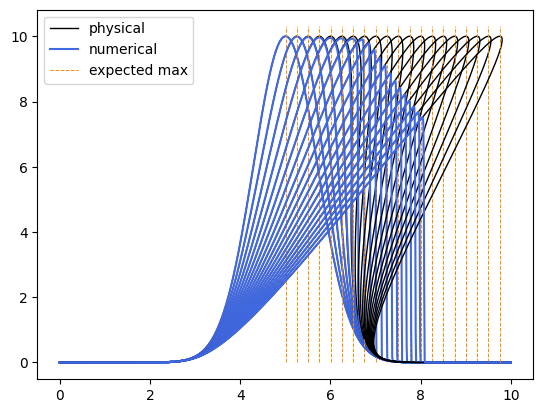

In [168]:
u_currentC = u0.copy()
t = 0
time=[]
time.append(0)
i=0
u_real = np.zeros((2,len(u0)))
u_real[1,:] = np.copy(u0)
maxima = []
maxima.append(max(u0))
X=5
    
while t<T:
    
    u_nextC = u_currentC - dt/dx/2*(u_currentC**2- np.roll(u_currentC,+1)**2)           
    u_currentC = u_nextC.copy()
    X += max(u0)*dt
    t = t+dt
    time.append(t)
    maxima.append(max(u_currentC))
    
    if i%50==0:
        for k in range(len(x)):
            u_real[0,k] = x[k]+u0[k]*t
        plt.plot(u_real[0],u_real[1],color='k',linewidth=1,label='physical')
        plt.plot(x,u_currentC,color='royalblue',label='numerical')
        plt.vlines(X,0,10.3,color='darkorange',linewidth=0.7,linestyle='--',label='expected max')
        if i==0:
            plt.legend()
        
    i+=1
    
#plt.savefig('./Homework_1/images/3_phys_real.png',dpi=150)
plt.show()

9.80781119004964 6.962279466423968
17.72453850902925 18.02005176710997


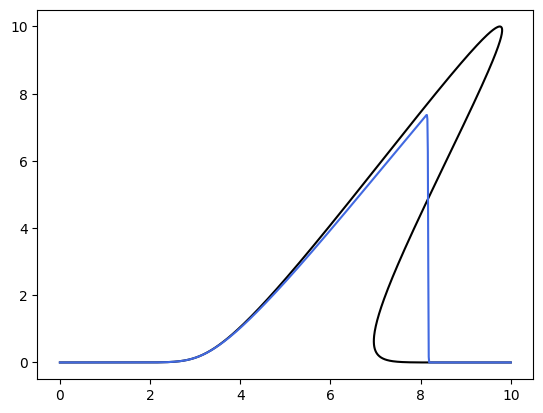

In [169]:
plt.plot(u_real[0],u_real[1],color='k',label='physical')
plt.plot(x,u_currentC,color='royalblue',label='numerical')

num_int=0
phy_int=0
for i in range(len(x)):
    num_int += u_currentC[i]*dx

realcutL = u_real[0][:int(0.6*len(x))]
top = max(realcutL)
realcutR = u_real[0][int(0.6*len(x)):]
bot = min(realcutR)
print(top,bot)
arr = []
for j in range(len(u_real[0])):
    arr.append(u_real[0][j])
T=arr.index(top)
B=arr.index(bot)

s_prev=u_real[0][0]
for i in range(len(u_real[0])):
    s = u_real[0][i]
    if i<T or i>B:
        phy_int += abs(s-s_prev)*u_real[1][i]
        s_prev = s
    else:
        phy_int = phy_int - abs(s-s_prev)*u_real[1][i]
        s_prev = s

print(num_int, phy_int)

### Comparison

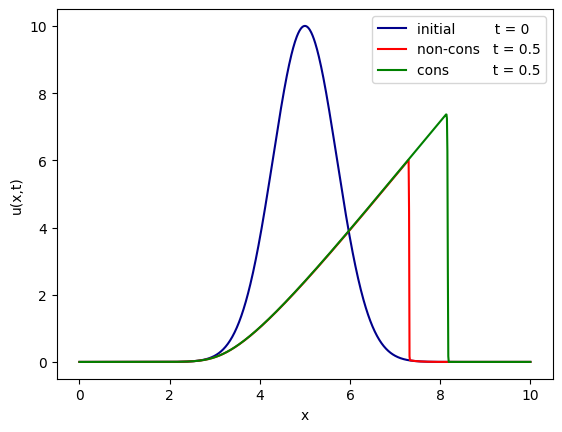

In [6]:
plt.plot(x,u0,color='darkblue',label='initial         t = 0')
plt.plot(x,u_current,color='r', label='non-cons   t = '+str(T))
plt.plot(x,u_currentC,color='g',label='cons          t = '+str(T))
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,t)')
#plt.savefig('./Homework_1/images/3_compare.png',dpi=150)
plt.show()

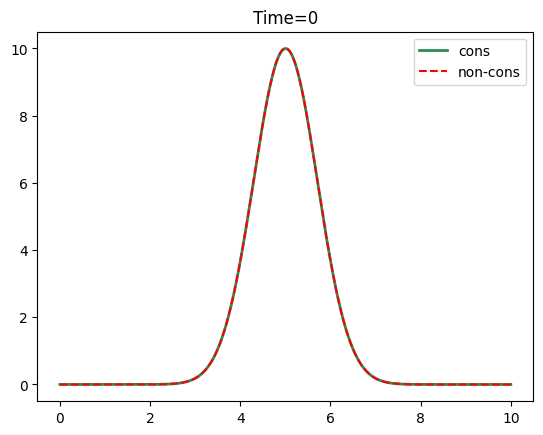

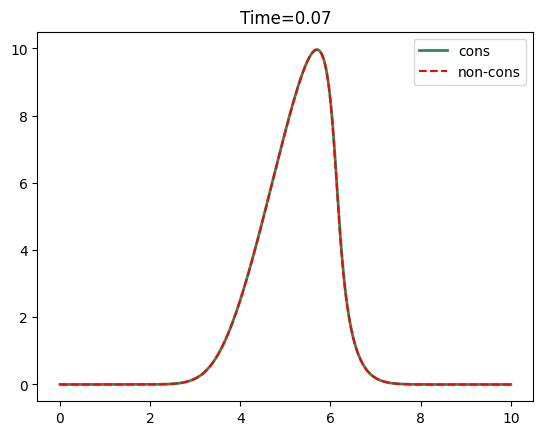

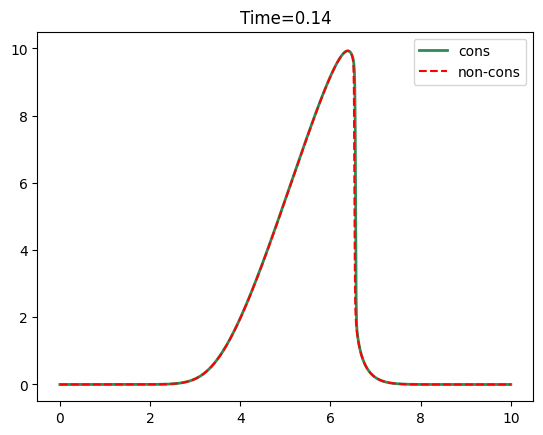

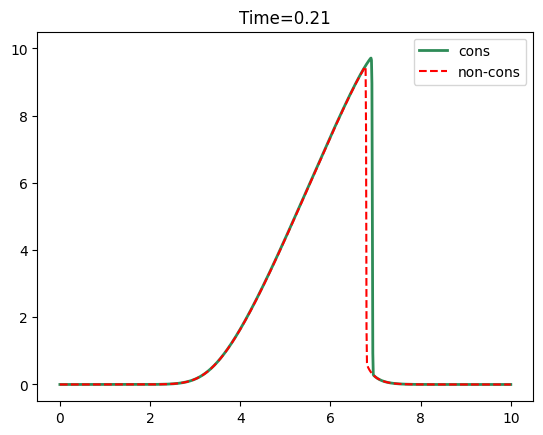

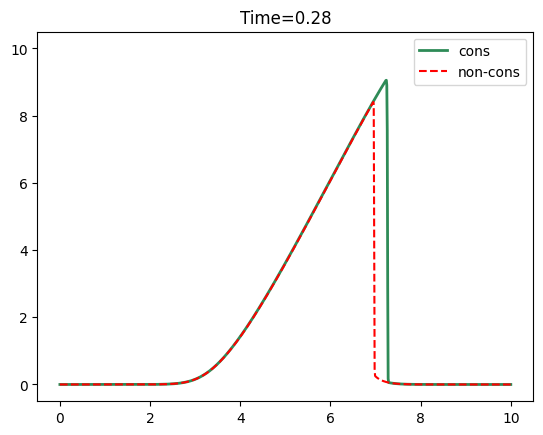

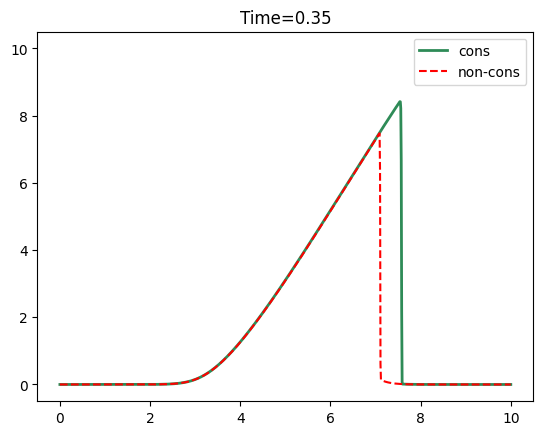

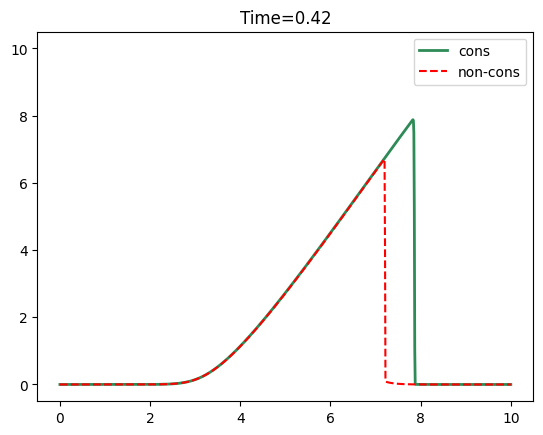

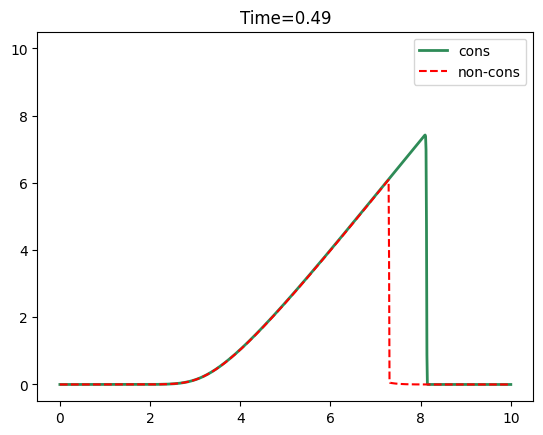

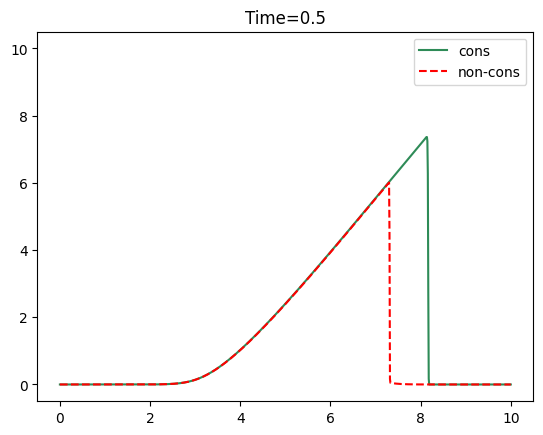

9


In [21]:
u_current_NC = u0.copy()
u_current_C = u0.copy()

t = 0
i = 0
k=0

while t<T:
    u_next_NC = u_current_NC - dt/dx*u_current_NC*(u_current_NC- np.roll(u_current_NC,+1)) 
    u_next_C = u_current_C - dt/dx/2*(u_current_C**2- np.roll(u_current_C,+1)**2)    
        
    u_current_NC = u_next_NC.copy()
    u_current_C = u_next_C.copy()
    
    if i%140==0:
        plt.plot(x,u_current_C,color='seagreen',linewidth=2, label='cons')
        plt.plot(x,u_current_NC,color='r',linestyle='--',label='non-cons')
        plt.ylim(-0.5,10.5)
        plt.legend()
        plt.title('Time='+str(round(t,3)))
        #plt.savefig('./Homework_1/images/3_compare_'+str(k)+'.png',dpi=150)
        plt.show()
        k+=1

    t = t+dt
    i += 1

k+=1
plt.plot(x,u_current_C,color='seagreen',label='cons')
plt.plot(x,u_current_NC,color='r',linestyle='--',label='non-cons')
plt.legend()
plt.ylim(-0.5,10.5)
plt.title('Time='+str(round(t,3)))
#plt.savefig('./Homework_1/images/3_time_'+str(k)+'.png',dpi=150)
plt.show()   
print(k)

## Changing J, Cf

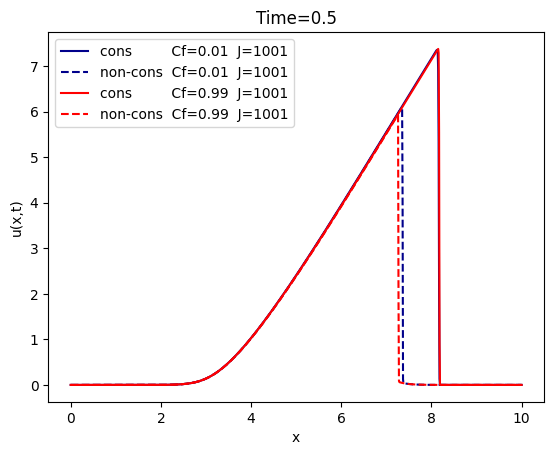

In [53]:
J = [1001]
CF = [0.01, 0.99]
T = 0.5
a = 10
c=0
colors=['darkblue','r','purple','g','orange','y']

for cf in CF:
    for j in J:
        dx = (10-0)/(j-1)
        x = np.linspace(0,10,j)
        u0 = np.zeros(len(x))
        for i in range(len(x)):
            u0[i] = 10 * np.exp(-(x[i]-5)**2)
        dt = cf*dx/a
        
        u_currentC = u0.copy()
        u_currentNC = u0.copy()
        t = 0
        while t<T:
            u_nextC = u_currentC - dt/dx/2*(u_currentC**2- np.roll(u_currentC,+1)**2)           
            u_currentC = u_nextC.copy()
            u_nextNC = u_currentNC - dt/dx*u_currentNC*(u_currentNC- np.roll(u_currentNC,+1))    
            u_currentNC = u_nextNC.copy()

            t = t+dt

        plt.plot(x,u_currentC,color=colors[c], label='cons         Cf='+str(cf)+'  J='+str(j))
        plt.plot(x,u_currentNC,color=colors[c], linestyle='--', label='non-cons  Cf='+str(cf)+'  J='+str(j))
        c+=1

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.title('Time='+str(T))
#plt.savefig('./Homework_1/images/3_cf.png',dpi=150)
plt.show()